# <center><a href='https://colab.research.google.com/github/fortierq/itc1/blob/master/files/5_graph/tp/tp3/tp_pagerank.ipynb'>TP Graphe 3 : Algorithme PageRank de Google  <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

> Pour savoir dans quel ordre afficher les résultats d'une recherche, Google utilise l'algorithme PageRank. Celui-ci consiste à faire une marche aléatoire sur le graphe du Web, dont les sommets sont les pages Internet et les arêtes sont les liens URL d'une page à une autre.

<center><img src=https://github.com/fortierq/itc1/blob/master/files/5_graph/tp/tp3/pagerank.png?raw=true width=650></center>

## Graphes aléatoires

Pour pouvoir tester notre algorithme, nous allons commencer par générer des graphes aléatoirement. Pour cela, on utilisera `random.random()` qui renvoie un réel choisi uniformément au hasard entre $0$ et $1$ :

In [1]:
import random

random.random()

0.4763813568141384

**Exercice** : Écrire une fonction `bernouilli` telle que, si `p` est un `float` entre $0$ et $1$, `bernouilli(p)` renvoie $1$ avec probabilité `p`, $0$ sinon.  
Indice : On pourra commencer avec `p` = $\frac{1}{2}$ (même probabilité d'obtenir un $1$ et un $0$).

In [2]:
def bernouilli(p):
    if random.random() < p:
        return 1
    else:
        return 0

**Exercice** : Écrire une fonction `random_graph(n, p)` qui renvoie un graphe orienté représenté par liste d'adjacence, avec `n` sommets et une probabilité `p` d'avoir une arête entre deux sommets.

In [3]:
def random_graph(n, p):
    G = []
    for i in range(n):
        G.append([])
        for j in range(n):
            if i != j and bernouilli(p):
                    G[i].append(j)
    return G

Pour afficher le graphe obtenu, on pourra utiliser la fonction suivante :

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)
def draw_graph(G):
    plt.clf()
    G_ = nx.DiGraph()
    for i in range(len(G)):
        for j in G[i]:
            G_.add_edge(i, j)
    nx.draw_networkx(G_, font_color ="w", node_color="black", node_size=600, arrowsize=35, font_size=16)
    plt.show()

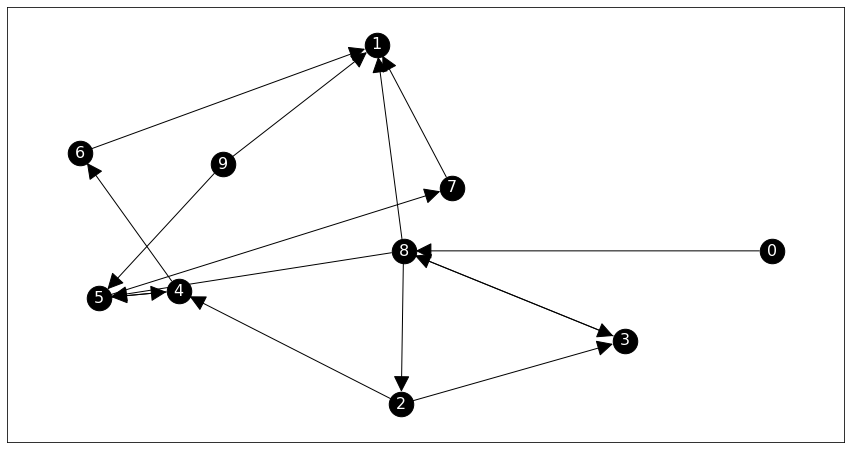

In [5]:
draw_graph(random_graph(10, 0.2))

**Exercice** : Écrire une fonction `number_edges` pour calculer le nombre d'arêtes d'un graphe orienté représenté par liste d'adjacence.

In [6]:
def number_edges(G):
    return sum([len(G[i]) for i in range(len(G))])

**Exercice** : En utilisant `number_edges` sur des graphes aléatoires, estimer le nombre moyen d'arêtes d'un graphe aléatoire obtenu par `random_graph(n, p)`, en fonction de `n` et de `p`.  
Retrouver ce résultat mathématiquement.

## PageRank

On considère un graphe où les sommets (numérotés à partir de $0$) représentent des pages Internet, et les arêtes représentent les liens URL d'une page à une autre. Pour classer les pages Web par ordre d'importance, l'algorithme PageRank effectue une marche aléatoire en se déplaçant à chaque fois vers un voisin pris au hasard. Plus la fréquence de passage sur un sommet est haute, plus la page Web correspondante se retrouvera en haut des résultats de recherche Google.

**Exercice** : Écrire une fonction `step(G, u)` renvoyant un voisin de `u` choisi aléatoirement dans le graphe `G` représenté par liste d'adjacence. On pourra utiliser `random.randrange(n)` qui renvoie un entier aléatoirement entre $0$ et $n - 1$.  
**Remarque** : Pour tester `step`, il faut que `u` possède au moins un voisin... Essayer donc avec un `random_graph(n, p)` avec `p` au moins égal à $0.3$, ou essayez plusieurs fois.

In [7]:
def step(G, u):
    j = random.randint(0, len(G[u]) - 1)
    return G[u][j]

**Exercice** : Écrire une fonction `pagerank(G, k)` qui part du sommet $0$ et effectue `k` déplacements au hasard (en utilisant `step`).  
Cette fonction doit renvoyer une liste `count` donnant le nombre de passages dans chaque sommet : `count[i]` doit être le nombre de passages sur le sommet `i`.

In [8]:
def pagerank(G, k):
    count = [0]*len(G)
    u = 0
    for i in range(k):
        u = step(G, u)
        count[u] += 1
    return count

**Exercice** : Écrire une fonction `add_index` telle que `add_index(L)` renvoie une liste `L2` de même taille que `L` telle que `L2[i]` contienne le couple `(L[i], i)`.

In [9]:
def add_index(L):
    L2 = []
    for i in range(len(L)):
        L2.append((L[i], i))
    return L2

**Exercice** : En déduire une fonction `rank` ayant en argument la liste `count` renvoyée par `pagerank` et qui renvoie la liste des sommets par valeur de `count` décroissante.  
Pour cela, on utilisera `L.sort(reverse=True)` qui trie une liste `L` en ordre décroissant, et le fait que l'on puisse trier une liste de couples (auquel cas la liste est triée suivant le premier élément de chaque couple)

In [10]:
def rank(count):
    L = add_index(count)
    L.sort(reverse=True)
    return [L[i][1] for i in range(len(count))]

**Exercice** : Vérifier sur des graphes aléatoires que la liste renvoyée par `rank` a l'air correcte, en affichant le graphe avec la fonction suivante, où la taille d'un sommet est proportionnelle à son rang.

In [11]:
def draw_count(G, rank):
    plt.clf()
    G_ = nx.DiGraph()
    G_.add_nodes_from(range(len(G)))
    for i in range(len(G)):
        for j in G[i]:
            G_.add_edge(i, j)
    r = [0]*len(rank)
    for i, e in enumerate(rank):
        r[e] = i + 1
    max_size = 5000
    a = (max_size - 500)/(1 - len(rank))
    node_sizes= [int(r[i]*a + max_size - a) for i in range(len(r))]
    nx.draw_networkx(G_, font_color ="w", node_color="black", node_size=node_sizes, arrowsize=35, font_size=16)
    plt.show()

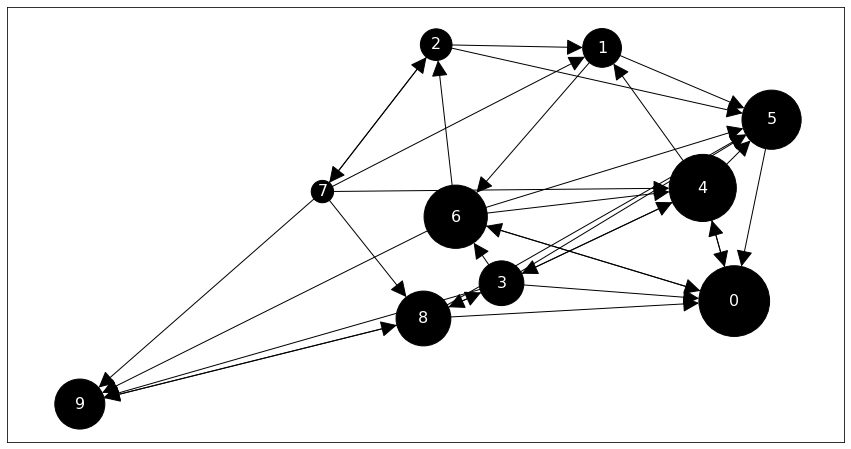

In [12]:
G = random_graph(10, 0.3)
count = pagerank(G, 5000)
r = rank(count)
draw_count(G, r)